In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Load the dataset
df = pd.read_csv("weather.csv")

In [66]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## Exploratory Data Analysis

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [68]:
# Check null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [69]:
#convert the data type into datetime
df['date'] = pd.to_datetime(df['date'])

In [70]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [71]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [72]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

## Data Visualization

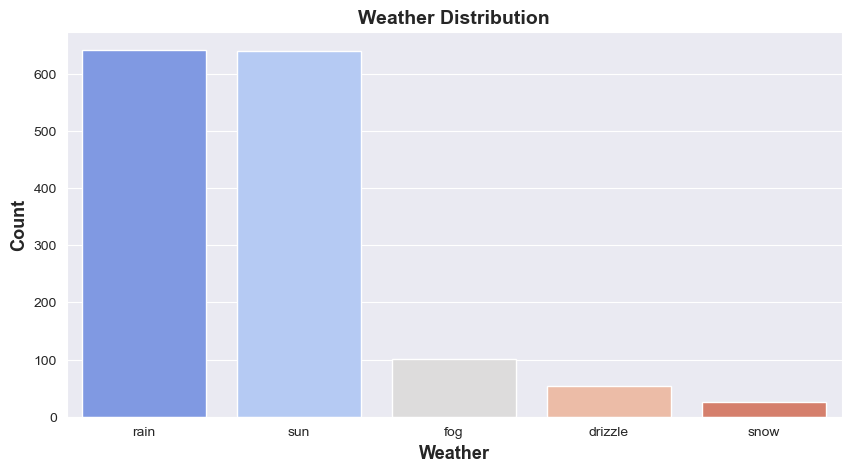

In [73]:
# Set ukuran figure
fig, ax = plt.subplots(figsize=(10, 5))

# Tema 
sns.set_style("whitegrid")

# Membuat countplot dengan pendekatan 
sns.barplot(
    x=df["weather"].value_counts().index, 
    y=df["weather"].value_counts().values, 
    palette="coolwarm", ax=ax
)

# Memberikan label
ax.set_xlabel("Weather", fontsize=13, fontweight="bold")
ax.set_ylabel("Count", fontsize=13, fontweight="bold")
ax.set_title("Weather Distribution", fontsize=14, fontweight="bold")
plt.show()

In [74]:
px.line(data_frame = df,
       x = 'date',
       y = 'temp_max', 
       title = 'Variation of Maximum Temperature')

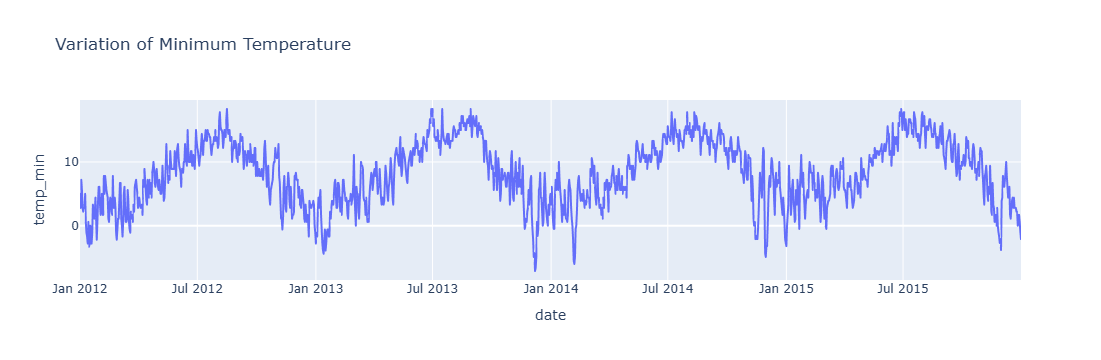

In [75]:
px.line(data_frame = df,
       x = 'date',
       y = 'temp_min', 
       title = 'Variation of Minimum Temperature')

<Figure size 1400x800 with 0 Axes>

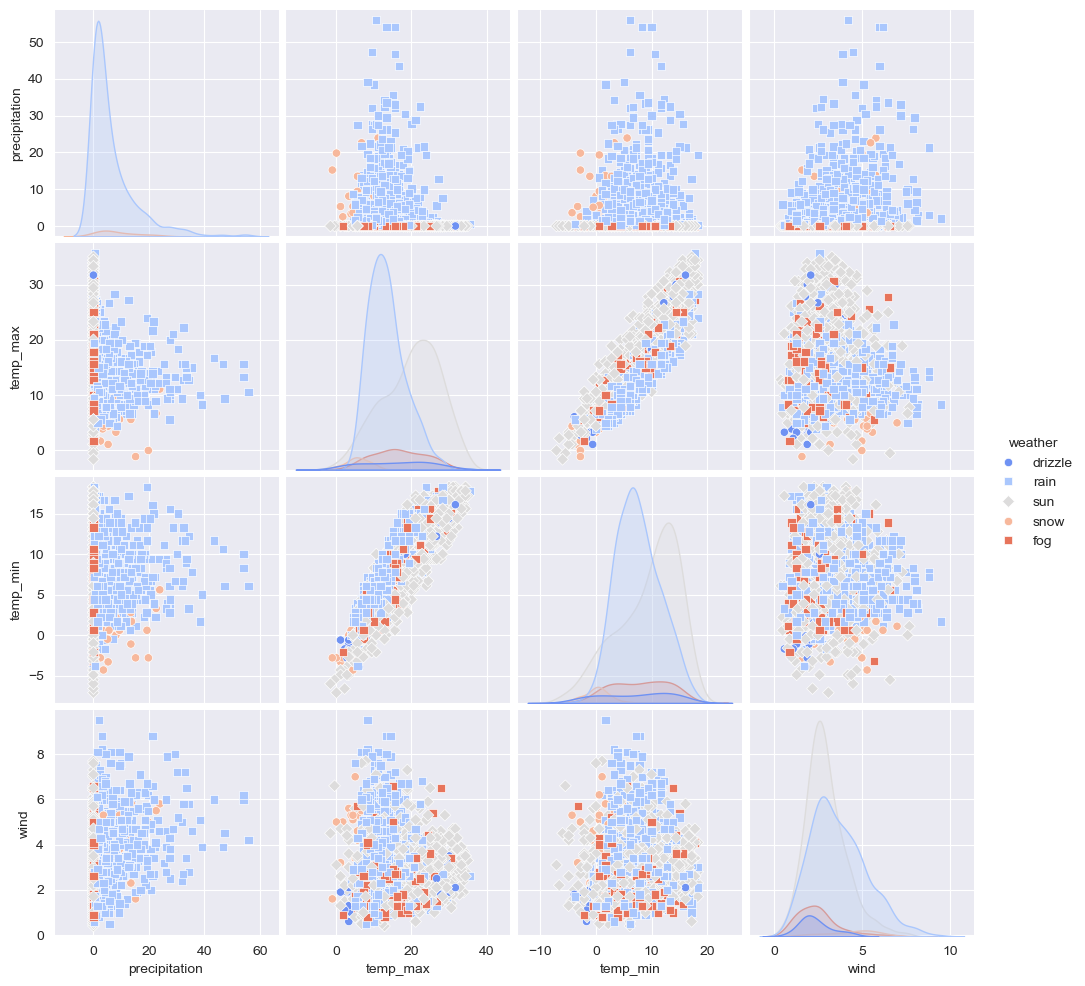

In [76]:
# Set ukuran figure
plt.figure(figsize=(14, 8))

# Tema 
sns.set_style("darkgrid")

# Membuat pairplot dengan pendekatan 
pairplot = sns.pairplot(
    df.drop(columns=["date"]),  # Drop kolom 'date'
    hue="weather",
    palette="coolwarm",  # palet warna
    markers=["o", "s", "D"],  # Variasi marker untuk setiap kategori
    diag_kind="kde"  # Ubah diagonal menjadi KDE plot
)

plt.show()

<Figure size 1000x500 with 0 Axes>

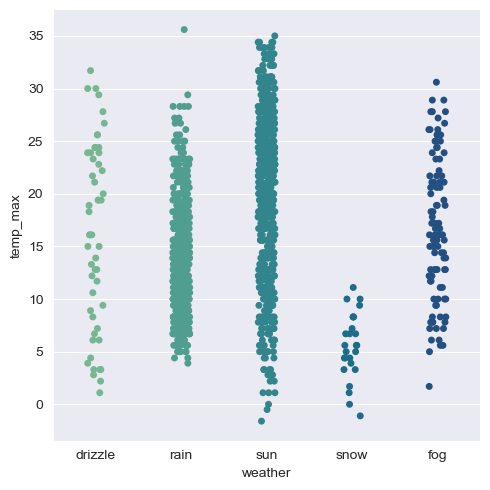

In [77]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")
plt.show()

<Figure size 1000x500 with 0 Axes>

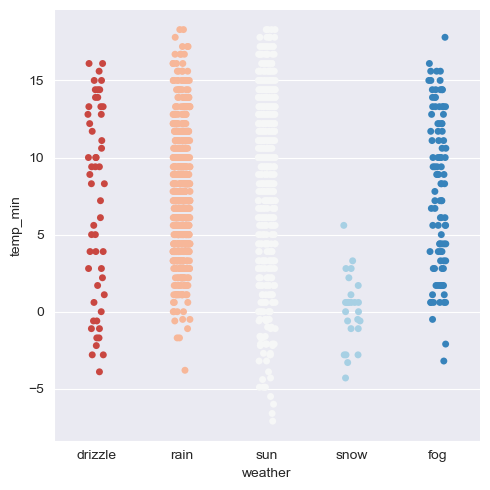

In [78]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")
plt.show()

## Data Preprocessing

In [79]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("weather")

In [80]:
df = df.drop('date',axis=1)

In [81]:
x = df.drop('weather',axis=1)
y = df['weather']

## Train Test Split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy score: 84.43%


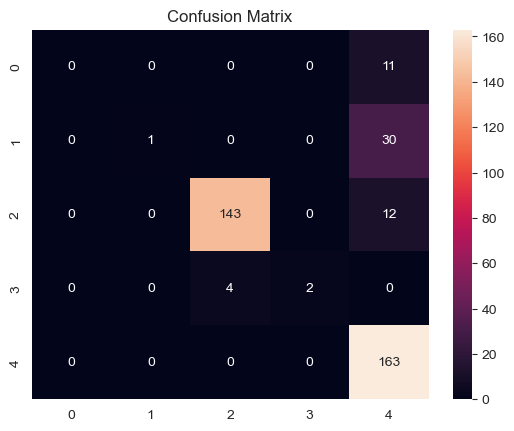

In [86]:
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf,annot=True, fmt = '.3g')
acc1 = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score: {acc1 * 100:.2f}%")
plt.title("Confusion Matrix")
plt.show()

In [87]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       1.00      0.03      0.06        31
           2       0.97      0.92      0.95       155
           3       1.00      0.33      0.50         6
           4       0.75      1.00      0.86       163

    accuracy                           0.84       366
   macro avg       0.75      0.46      0.47       366
weighted avg       0.85      0.84      0.80       366



## Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Accuracy score: 80.60%


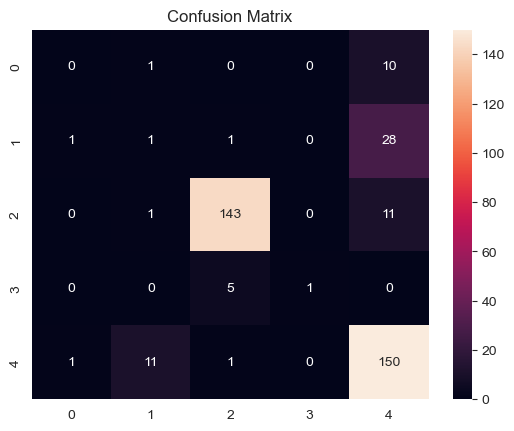

In [89]:
y_pred_gb = model_gb.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb,annot=True, fmt = '.3g')
acc1 = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy score: {acc1 * 100:.2f}%")
plt.title("Confusion Matrix")
plt.show()

In [90]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.07      0.03      0.04        31
           2       0.95      0.92      0.94       155
           3       1.00      0.17      0.29         6
           4       0.75      0.92      0.83       163

    accuracy                           0.81       366
   macro avg       0.56      0.41      0.42       366
weighted avg       0.76      0.81      0.77       366



## Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

Accuracy score: 81.97%


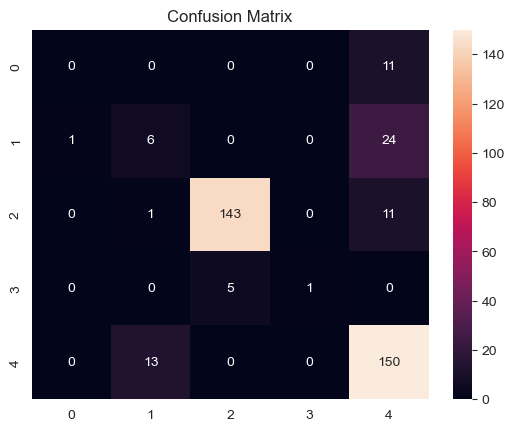

In [92]:
y_pred_dt = model_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt,annot=True, fmt = '.3g')
acc1 = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {acc1 * 100:.2f}%")
plt.title("Confusion Matrix")
plt.show()

In [93]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.30      0.19      0.24        31
           2       0.97      0.92      0.94       155
           3       1.00      0.17      0.29         6
           4       0.77      0.92      0.84       163

    accuracy                           0.82       366
   macro avg       0.61      0.44      0.46       366
weighted avg       0.79      0.82      0.80       366



In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hasil perbandingan model
models = {"Decision Tree": model_dt, "Random Forest": model_rf, "Gradient Boosting": model_gb}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

results_df = pd.DataFrame(results).T
print(results_df)

                   Accuracy  Precision    Recall  F1-score
Decision Tree      0.819672   0.791826  0.819672  0.796513
Random Forest      0.844262   0.849145  0.844262  0.797627
Gradient Boosting  0.806011   0.761872  0.806011  0.774643
